TUGAS KELOMPOK MINI PROJECT CV

**Klasifikasi gambar pakaian**

list nama anggota kelompok
1. Ismi Oktaviani (winning eleven)
2. putri andriani (winning eleven)
3. Rizkiyatul Komariyah (Jumatec)
4. MOKHAMMAD FATIKHUL IKHSAN (jumatec)
5. Rafli Saviola (Jumatec)
6.Jaya Hartina Harahap ( Jumatec)
7. Theodora Ayuningtyas B. p(winning eleven)



 membangun sebuah model neural network yang dapat mengklasifikasikan gambar pakaian, seperti sneaker dan baju.

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


kelompok kami menggunakan dataset Fashion MNIST yang memiliki 70,000 gambar hitam putih dalam 10 kategori pakaian. Tiap gambar menunjukan gambar dari satu tipe pakaian dalam resolusi rendah (28 x 28 pixel).

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Eksplorasi Data

Mari kita lakukan eksplorasi dari format dataset sebelum kita menggunakan data tersebut untuk membangun model.

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

## Melakukan preprocessing terhadap data

Data harus diolah terlebih dahulu sebelum digunakan untuk membangun model neural network. Jika Anda mengamati gambar pertama dalam training set, Anda akan melihat bahwa nilai pixel dari gambar memiliki rentang antara 0 sampai dengan 255:

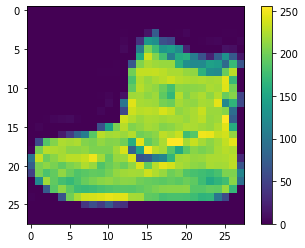

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Untuk memastikan bahwa data dalam format yang benar dan Anda siap untuk membangun dan melatih model neural network, mari kita tampilkan 25 gambar pertama dari training set dan menampilkan nama kelas di bawah dari tiap gambar.

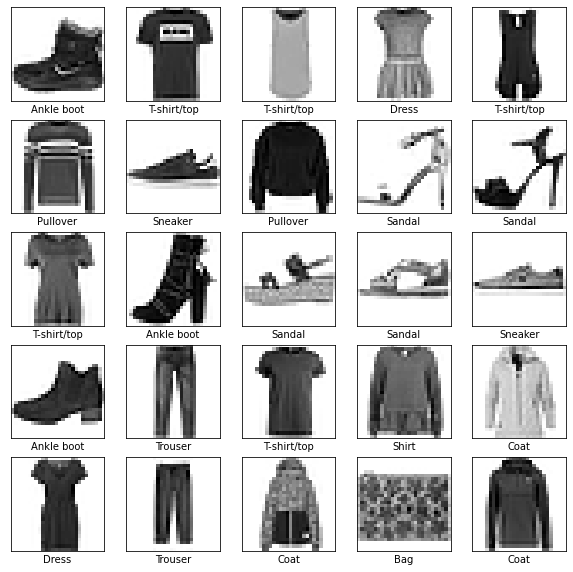

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Membangun model

Untuk dapat membuat sebuah model neural network, perlu dilakukan konfigurasi layer untuk model tersebut, sehingga proses kompilasi pada model dapat dilakukan.

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4994 - accuracy: 0.8249
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3739 - accuracy: 0.8636
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3374 - accuracy: 0.8759
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3112 - accuracy: 0.8862
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2941 - accuracy: 0.8919
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2812 - accuracy: 0.8951
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2702 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2572 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2477 - accuracy: 0.9081
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.238

## Evaluasi nilai dari akurasi

Selanjutnya, bandingkan bagaimana performansi dari model terhadap data test:

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)


313/313 - 1s - loss: 0.3396 - accuracy: 0.8836 - 546ms/epoch - 2ms/step


## Membuat prediksi

Dengan model yang telah dilatih menggunakan data training, Anda dapat menggunakan model tersebut untuk memprediksi berbagai gambar.

In [ ]:
predictions[0]

array([4.2106405e-11, 2.8975169e-12, 1.6180172e-11, 3.2526355e-13,
       1.0877908e-11, 1.0340915e-03, 1.3371745e-10, 2.4234140e-03,
       4.5154760e-09, 9.9654251e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

Gambar berikut digunakan untuk melihat seluruh set dari prediksi 10 kelas.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Mari lihat gambar ke-0, prediksi, dan array prediksi. Label prediksi yang tepat berwarna biru dan label prediksi yang salah akan berwarna merah. Bilangan yang ada memberikan presentase (dari 100) untuk label yang diprediksi.

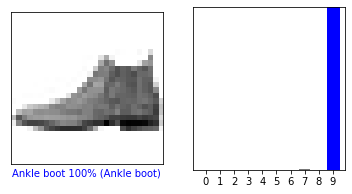

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

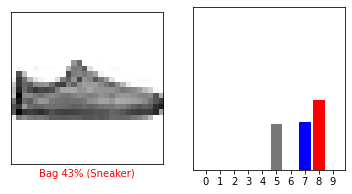

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Mari buat plot beberapa gambar dengan prediksinya. Perhatikan bahwa model dapat salah meskipun model sangat percaya diri dengan prediksinya.

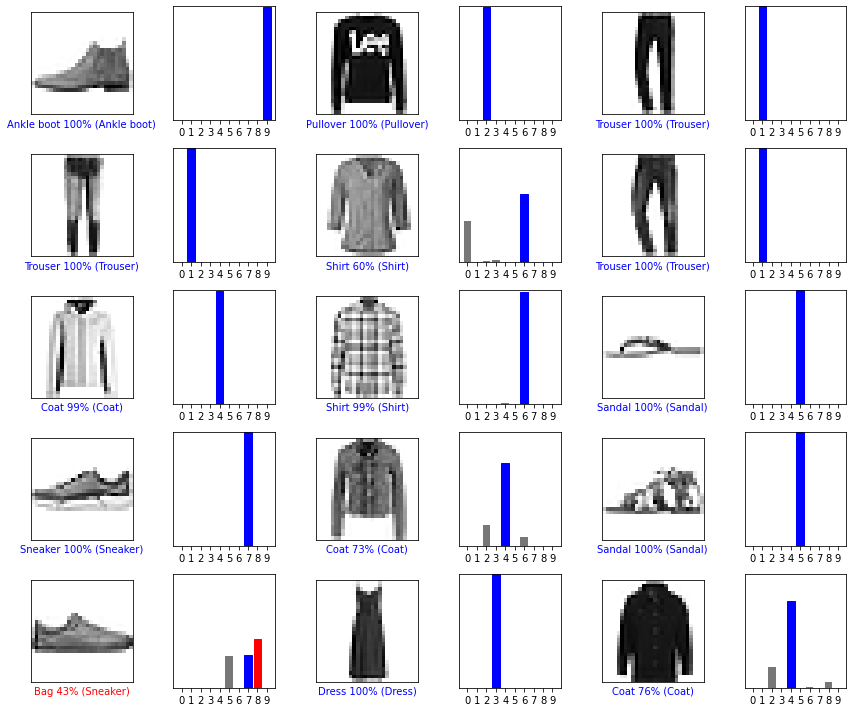

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Akhirnya, gunakan model yang telah dibuat untuk membuat prediksi terhadap sebuah gambar.

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


model-model `tf.keras` dioptimalisasi untuk membuat prediksi dalam sebuah *batch*, atau koleksi, dari contoh-contoh sekaligus. Sehingga, meskipun Anda menggunakan satu gambar, Anda harus menambahkan gambar tersebut ke dalam list:

In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Sekarang prediksi label yang tepat untuk gambar ini:

In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

[[4.3701980e-04 7.0298615e-12 9.9853885e-01 2.7502727e-08 2.7891248e-04
  2.0190887e-09 7.4530143e-04 5.1000904e-18 4.4072106e-09 3.2872251e-14]]


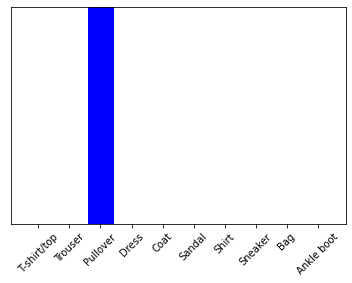

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

model.predict mengembalikan list dari list—satu list untuk setiap gambar di dalam batch dari data. Lakukan prediksi untuk gambar dalam batch ini:

In [ ]:
np.argmax(predictions_single[0])

2

Dan model memprediksi label sesuai yang diharapkan.